<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Ahmed Yasser Elgohary Hanafy

GUC-ID: 43-2906

Elective Tutorial No.: T-05

**Member 2**

Name: Omar Sameh Ali

GUC-ID: 43-1931

Elective Tutorial No.: T-02

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [2]:
# X_train, X_test
x_train_airplane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=x_train_airplane
y_train=np.repeat(0,5000)
x_test_airplane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=x_test_airplane
y_test=np.repeat(0,1000)

x_train_automobile = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=np.concatenate((x_train,x_train_automobile))
y_train=np.concatenate((y_train,np.repeat(1,5000)))
x_test_automobile = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=np.concatenate((x_test,x_test_automobile))
y_test=np.concatenate((y_test,np.repeat(1,1000)))

x_train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=np.concatenate((x_train,x_train_frog))
y_train=np.concatenate((y_train,np.repeat(2,5000)))
x_test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=np.concatenate((x_test,x_test_frog))
y_test=np.concatenate((y_test,np.repeat(2,1000)))
x_train_16=[]
x_test_16=[]
x_train_8=[]
x_test_8=[]
x_train_4=[]
x_test_4=[]

for i in range(15000):
    x_train_16.append(cv2.resize(x_train[i], (16,16), interpolation=cv2.INTER_AREA))
for i in range(3000):
    x_test_16.append(cv2.resize(x_test[i], (16,16), interpolation=cv2.INTER_AREA))

for i in range(15000):
    x_train_8.append(cv2.resize(x_train[i], (8,8), interpolation=cv2.INTER_AREA))
for i in range(3000):
    x_test_8.append(cv2.resize(x_test[i], (8,8), interpolation=cv2.INTER_AREA))

for i in range(15000):
    x_train_4.append(cv2.resize(x_train[i], (4,4), interpolation=cv2.INTER_AREA))
for i in range(3000):
    x_test_4.append(cv2.resize(x_test[i], (4,4), interpolation=cv2.INTER_AREA))

x_train_16 = np.asarray(x_train_16, dtype=np.float64)
x_test_16=np.asarray(x_test_16, dtype=np.float64)

x_train_8 = np.asarray(x_train_8, dtype=np.float64)
x_test_8=np.asarray(x_test_8, dtype=np.float64)

x_train_4 = np.asarray(x_train_4, dtype=np.float64)
x_test_4=np.asarray(x_test_4, dtype=np.float64)

x_train=x_train/255
x_test=x_test/255

x_train_16=x_train_16/255
x_test_16=x_test_16/255

x_train_8=x_train_8/255
x_test_8=x_test_8/255

x_train_4=x_train_4/255
x_test_4=x_test_4/255




<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [3]:
#confusion_matrices_nb += [confusion_matrix]
X_train=np.reshape(x_train,(15000,32*32*3))
X_test=np.reshape(x_test,(3000,32*32*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)
var_au=x_train_automobile.var(axis=0)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)
var_f=x_train_frog.var(axis=0)


y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])


# Test
for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_a))*(np.exp(-((X_test[i]-mean_a)**2)/(2*var_a)))
    y_airplane[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_au))*(np.exp(-((X_test[i]-mean_au)**2)/(2*var_au)))
    y_automobile[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_f))*(np.exp(-((X_test[i]-mean_f)**2)/(2*var_f)))
    y_frog[i]=np.prod(temp)

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_nb += [confusion_matrix]


C:\Users\ahmed\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [4]:
#confusion_matrices_nb += [confusion_matrix]
X_train=np.reshape(x_train_16,(15000,16*16*3))
X_test=np.reshape(x_test_16,(3000,16*16*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)
var_au=x_train_automobile.var(axis=0)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)
var_f=x_train_frog.var(axis=0)


y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])


# Test
for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_a))*(np.exp(-((X_test[i]-mean_a)**2)/(2*var_a)))
    y_airplane[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_au))*(np.exp(-((X_test[i]-mean_au)**2)/(2*var_au)))
    y_automobile[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_f))*(np.exp(-((X_test[i]-mean_f)**2)/(2*var_f)))
    y_frog[i]=np.prod(temp)

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_nb += [confusion_matrix]

In [5]:
X_train=np.reshape(x_train_8,(15000,8*8*3))
X_test=np.reshape(x_test_8,(3000,8*8*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)
var_au=x_train_automobile.var(axis=0)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)
var_f=x_train_frog.var(axis=0)


y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])


# Test
for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_a))*(np.exp(-((X_test[i]-mean_a)**2)/(2*var_a)))
    y_airplane[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_au))*(np.exp(-((X_test[i]-mean_au)**2)/(2*var_au)))
    y_automobile[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_f))*(np.exp(-((X_test[i]-mean_f)**2)/(2*var_f)))
    y_frog[i]=np.prod(temp)

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_nb += [confusion_matrix]

In [6]:
X_train=np.reshape(x_train_4,(15000,4*4*3))
X_test=np.reshape(x_test_4,(3000,4*4*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)
var_au=x_train_automobile.var(axis=0)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)
var_f=x_train_frog.var(axis=0)


y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])


# Test
for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_a))*(np.exp(-((X_test[i]-mean_a)**2)/(2*var_a)))
    y_airplane[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_au))*(np.exp(-((X_test[i]-mean_au)**2)/(2*var_au)))
    y_automobile[i]=np.prod(temp)

for i in range(3000):
    temp=(1/np.sqrt(2*np.pi*var_f))*(np.exp(-((X_test[i]-mean_f)**2)/(2*var_f)))
    y_frog[i]=np.prod(temp)

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_nb += [confusion_matrix]

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [7]:
#confusion_matrices_gm += [confusion_matrix]
X_train=np.reshape(x_train,(15000,32*32*3))
X_test=np.reshape(x_test,(3000,32*32*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

S_a=np.zeros([3072])

matrix1=np.array(x_train_airplane-mean_a)
matrix1_transpose=np.transpose(matrix1)
S_a=S_a+np.matmul(matrix1_transpose,matrix1)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)

S_au=np.zeros([3072])
matrix1=np.array(x_train_automobile-mean_au)
matrix1_transpose=np.transpose(matrix1)
S_au=S_au+np.matmul(matrix1_transpose,matrix1)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)

S_f=np.zeros([3072])
matrix1=np.array(x_train_frog-mean_f)
matrix1_transpose=np.transpose(matrix1)
S_f=S_f+np.matmul(matrix1_transpose,matrix1)

cov=(1/3)*(S_a+S_au+S_f)
cov_inv=np.linalg.pinv(cov)

y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])

# ∑=(N1/N)*S1+(N2/N)*S2


# Test
for i in range(3000):
    temp=X_test[i]-mean_a
    y_airplane[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_au
    y_automobile[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_f
    y_frog[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_gm += [confusion_matrix]

In [8]:
X_train=np.reshape(x_train_16,(15000,16*16*3))
X_test=np.reshape(x_test_16,(3000,16*16*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

S_a=np.zeros([768])

matrix1=np.array(x_train_airplane-mean_a)
matrix1_transpose=np.transpose(matrix1)
S_a=S_a+np.matmul(matrix1_transpose,matrix1)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)

S_au=np.zeros([768])
matrix1=np.array(x_train_automobile-mean_au)
matrix1_transpose=np.transpose(matrix1)
S_au=S_au+np.matmul(matrix1_transpose,matrix1)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)

S_f=np.zeros([768])
matrix1=np.array(x_train_frog-mean_f)
matrix1_transpose=np.transpose(matrix1)
S_f=S_f+np.matmul(matrix1_transpose,matrix1)

cov=(1/3)*(S_a+S_au+S_f)
cov_inv=np.linalg.pinv(cov)

y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])

# ∑=(N1/N)*S1+(N2/N)*S2


# Test
for i in range(3000):
    temp=X_test[i]-mean_a
    y_airplane[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_au
    y_automobile[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_f
    y_frog[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_gm += [confusion_matrix]

In [9]:
X_train=np.reshape(x_train_8,(15000,8*8*3))
X_test=np.reshape(x_test_8,(3000,8*8*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

S_a=np.zeros([192])

matrix1=np.array(x_train_airplane-mean_a)
matrix1_transpose=np.transpose(matrix1)
S_a=S_a+np.matmul(matrix1_transpose,matrix1)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)

S_au=np.zeros([192])
matrix1=np.array(x_train_automobile-mean_au)
matrix1_transpose=np.transpose(matrix1)
S_au=S_au+np.matmul(matrix1_transpose,matrix1)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)

S_f=np.zeros([192])
matrix1=np.array(x_train_frog-mean_f)
matrix1_transpose=np.transpose(matrix1)
S_f=S_f+np.matmul(matrix1_transpose,matrix1)

cov=(1/3)*(S_a+S_au+S_f)
cov_inv=np.linalg.pinv(cov)

y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])

# ∑=(N1/N)*S1+(N2/N)*S2


# Test
for i in range(3000):
    temp=X_test[i]-mean_a
    y_airplane[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_au
    y_automobile[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_f
    y_frog[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_gm += [confusion_matrix]

In [10]:
X_train=np.reshape(x_train_4,(15000,4*4*3))
X_test=np.reshape(x_test_4,(3000,4*4*3))

x_train_airplane=X_train[y_train==0]
mean_a=x_train_airplane.mean(axis=0)
var_a=x_train_airplane.var(axis=0)

S_a=np.zeros([48])

matrix1=np.array(x_train_airplane-mean_a)
matrix1_transpose=np.transpose(matrix1)
S_a=S_a+np.matmul(matrix1_transpose,matrix1)

#automobile
x_train_automobile=X_train[y_train==1]
mean_au=x_train_automobile.mean(axis=0)

S_au=np.zeros([48])
matrix1=np.array(x_train_automobile-mean_au)
matrix1_transpose=np.transpose(matrix1)
S_au=S_au+np.matmul(matrix1_transpose,matrix1)

#frog
x_train_frog=X_train[y_train==2]
mean_f=x_train_frog.mean(axis=0)

S_f=np.zeros([48])
matrix1=np.array(x_train_frog-mean_f)
matrix1_transpose=np.transpose(matrix1)
S_f=S_f+np.matmul(matrix1_transpose,matrix1)

cov=(1/3)*(S_a+S_au+S_f)
cov_inv=np.linalg.pinv(cov)

y_airplane=np.zeros([3000])
y_automobile=np.zeros([3000])
y_frog=np.zeros([3000])

# ∑=(N1/N)*S1+(N2/N)*S2


# Test
for i in range(3000):
    temp=X_test[i]-mean_a
    y_airplane[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_au
    y_automobile[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

for i in range(3000):
    temp=X_test[i]-mean_f
    y_frog[i]=np.exp((-1/2)*(temp@cov_inv@temp.T))
    

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
confusion_matrices_gm += [confusion_matrix]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [11]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


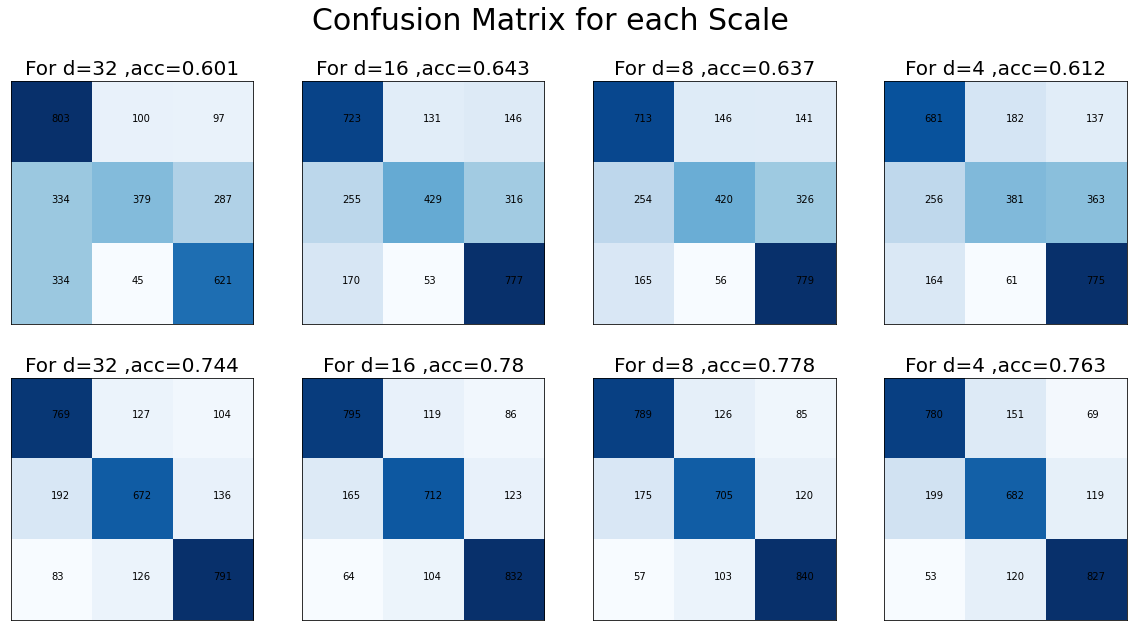

In [12]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

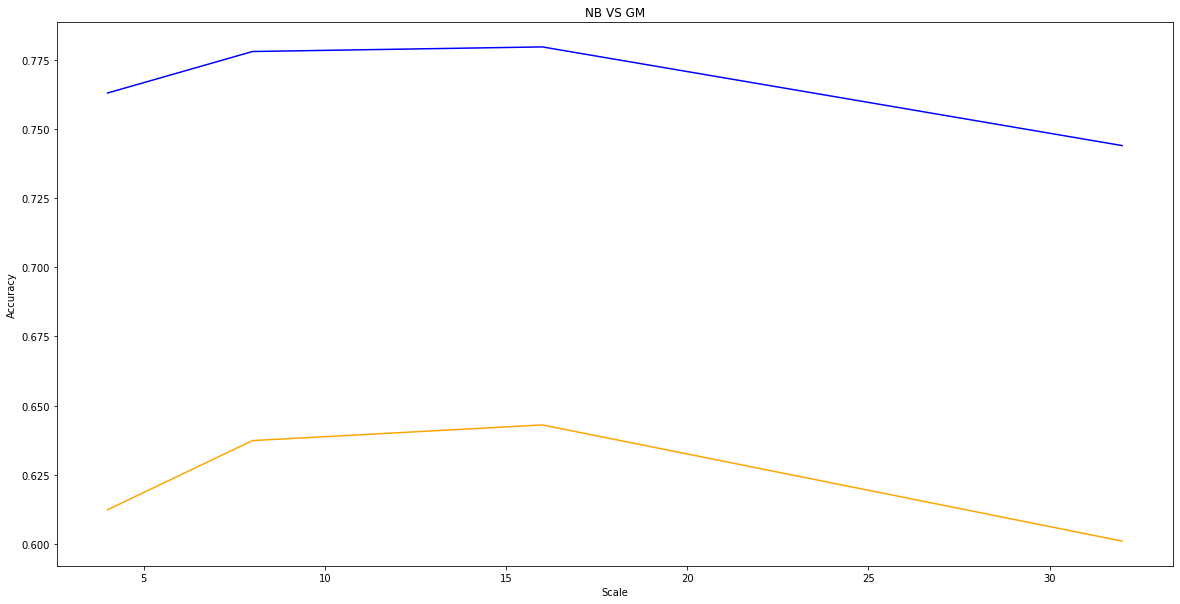

In [13]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
GM assumes that the dimensions are dependent and follow a gaussian distribution.

NB assumes that the dimensions are independent.


As we can see from the scores, the assumption of the GM is better since it obtained better scores which means that the dimensions are not independent.

The difference in scores while resizing the image can be explained as the following: when the images were 32x32, the effect of the background was very obvious, and when the images were 4x4, the number of features was too low, so 16x16 and 8x8 produced better scores since they are more balanced.
###